# **ML Algorithm to Predict Loan Repayment - LendingClub Data**

https://github.com/danielfergu/ml-lendingclub

# Introduction and Topic

**Overview:**
The financial industry is heavily reliant on accurate risk assessment to ensure stability and profitability. One critical aspect is managing the risk associated with loan defaults. This project addresses the challenge by developing a machine learning algorithm to predict loan repayment outcomes using LendingClub data.

**Goal:**
The primary objective of this project is to predict whether a loan will default based on borrower details and loan attributes. Accurate predictions will help financial institutions manage risk more effectively and make well-informed lending decisions.

**Significance:**
Reducing lender risk is of paramount importance. Lenders are at risk both from borrowers who default on their loans and from rejecting applicants who would have successfully repaid.

**Methodology:**
This project will perform data cleaning to address missing values and inconsistencies, followed by exploratory data analysis (EDA) and visualizations to uncover patterns and inform feature selection. Appropriate models will be evaluated and compared. The best-performing model will be selected based on its accuracy and robustness in predicting loan defaults. The data is labeled, making this a **supervised learning** approach focused on a **classification task**: predicting whether a loan will be repaid or not.


# Dataset

**Source:**

The dataset is sourced from Lending Club and was collected and published on Kaggle under the License CC0: Public Domain. Here is the proper citation in APA format:


George, N. (2018). All Lending Club loan data (Version 3.0) [Data set]. Kaggle. https://www.kaggle.com/datasets/wordsforthewise/lending-club


Lending Club is a peer-to-peer lending company that connects borrowers with investors. The dataset used in this project includes information about loans issued by Lending Club. It was halved randomly to reduce its size for use in Jupyter notebooks.

In [2]:
import requests
import gzip
import shutil

def download_and_unzip_gz(url, download_path, output_path):
    response = requests.get(url, stream=True)
    response.raise_for_status()

    with open(download_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

    with gzip.open(download_path, 'rb') as f_in:
        with open(output_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

url = 'https://dfgwebpersonal.s3.amazonaws.com/dataset_half.csv.gz'
download_path = 'dataset.gz'
output_path = 'dataset.csv'

# Call the function to download and unzip the file
download_and_unzip_gz(url, download_path, output_path)

# Data Overview:

The original dataset contains over 2.2 million rows and 151 columns. For RAM considerations, a subset of 1.1M rows is used.

The dataset is in a single-table format, consolidating all features into one table.

Number of samples/rows: 1,130,350

Number of features/columns: 151

Total memory usage: 3,332,475,356 bytes

**Summary of Feature Types:**

Numeric Features (float64): 113

Categorical Features (object): 38

**Key features include:**

*   loan_amnt: Amount of the loan requested by the borrower.
*   funded_amnt: Amount of the loan actually funded.
*   term: Loan duration in months (36 or 60).
*   int_rate: Loan interest rate.
*   installment: Monthly payment if the loan is approved.
*   grade: Loan grade assigned by LC.
*   sub_grade: Loan subgrade assigned by LC.
*   emp_title: Borrower's job title.
*   emp_length: Employment duration in years (0 to 10).
*   home_ownership: Borrower's home ownership status.
*   annual_inc: Borrower's self-reported annual income.
*   verification_status: Income verification status by LC.
*   issue_d: Month the loan was funded.
*   loan_status: Current status of the loan.
*   pymnt_plan: Indicates if there is a payment plan.
*   purpose: Borrower's stated purpose for the loan.
*   title: Loan title provided by the borrower.
*   zip_code: First 3 digits of the borrower's zip code.
*   addr_state: State provided in the loan application.
*   dti: Debt-to-income ratio.
*   earliest_cr_line: Month of the borrower's first credit line.
*   fico_range_low: Lower bound of the borrower's FICO score range.
*   fico_range_high: Upper bound of the borrower's FICO score range.
*   inq_last_6mths: Number of inquiries in the last 6 months.
*   open_acc: Number of open credit lines.
*   pub_rec: Number of derogatory public records.
*   revol_bal: Total revolving credit balance.
*   revol_util: Revolving credit utilization rate.
*   total_acc: Total number of credit lines.
*   initial_list_status: Initial status of the loan listing.
*   application_type: Type of loan application (individual or joint).
*   mort_acc: Number of mortgage accounts.
*   pub_rec_bankruptcies: Number of public record bankruptcies.
*   out_prncp: Remaining principal amount.
*   total_pymnt: Total payments made.
*   total_rec_prncp: Total principal received.
*   total_rec_int: Total interest received.
*   total_rec_late_fee: Total late fees received.
*   last_pymnt_d: Date of last payment.
*   last_pymnt_amnt: Amount of the last payment.
*   last_credit_pull_d: Date of the last credit pull.
*   policy_code: Policy code for the loan.
*   acc_now_delinq: Number of accounts currently delinquent.
*   tot_coll_amt: Total collection amount.
*   tot_cur_bal: Total current balance.
*   total_rev_hi_lim: Total revolving high credit limit.



In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv("dataset.csv")

# Number of rows and columns
num_rows, num_columns = data.shape
print(f"Number of samples/rows: {num_rows}")
print(f"Number of features/columns: {num_columns}")

# Data types of each feature
print("\nData types of each feature:")
print(data.dtypes)

# Memory usage
memory_usage = data.memory_usage(deep=True).sum()
print(f"\nTotal memory usage: {memory_usage} bytes")

# Summary of feature types
feature_types = data.dtypes.value_counts()
print("\nSummary of feature types:")
print(feature_types)

# Summary of categorical and numeric features
categorical_features = data.select_dtypes(include=['object', 'category']).columns
numeric_features = data.select_dtypes(include=['number']).columns
print(f"\nNumber of categorical features: {len(categorical_features)}")
print(f"Number of numeric features: {len(numeric_features)}")


<ipython-input-3-78efb5096abb>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset.csv")


Number of samples/rows: 1130350
Number of features/columns: 151

Data types of each feature:
id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

Total memory usage: 3332475356 bytes

Summary of feature types:
float64    113
object      38
Name: count, dtype: int64

Number of categorical features: 38
Number of numeric features: 113


# Data Cleaning

To prepare the dataset for a binary classification problem, let's perform the following steps:

Convert loan_status to Binary: Transform loan_status into a binary target variable (default) where 'Charged Off' and 'Default' are considered defaults (1), and other statuses are not defaults (0).

Drop loan_status: Remove the original loan_status column as it is now redundant.

Clean zip_code: Retain only the first three digits of the zip_code to address anonymization.

Remove Anonymized and Irrelevant Columns: Drop addr_state (anonymized), and id, member_id, url, desc, and title (irrelevant).



In [4]:
# Convert all loan_status values to strings
data['loan_status'] = data['loan_status'].astype(str)

# Create a binary target variable: 1 for Default, 0 for Not Default
default_status = ['Charged Off', 'Default']
data['default'] = data['loan_status'].apply(lambda x: 1 if x in default_status else 0)

# Verify the distribution of the new target variable
print(data['default'].value_counts())

# Drop the original loan_status column
data = data.drop(columns=['loan_status'])

# Only use the first three numbers of the zip code
data['zip_code'] = data['zip_code'].apply(lambda x: str(x)[:3])

# Remove addr_state due to anonymization
data = data.drop(columns=['addr_state'])

# Drop id, member_id, url, desc, title
data = data.drop(columns=['id', 'member_id', 'url', 'desc', 'title'])


default
0    996151
1    134199
Name: count, dtype: int64


Check for imbalances

If we look at the distribution of Defaulted vs non-defaulted loans, we can clearly see the data is not balanced.

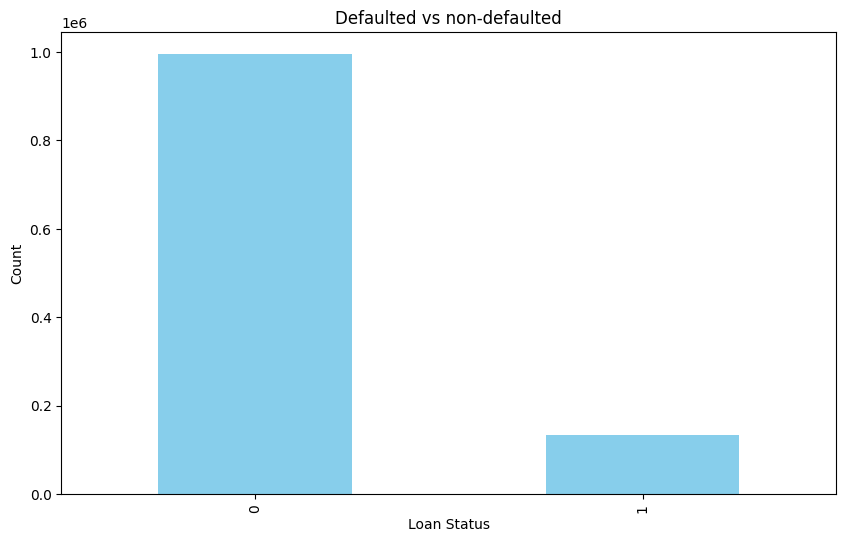

In [5]:
import matplotlib.pyplot as plt

# Calculate the value counts for the 'loan_status' column
loan_status_counts = data['default'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
loan_status_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title("Defaulted vs non-defaulted")
plt.xlabel("Loan Status")
plt.ylabel("Count")

# Display the plot
plt.show()

**Conclusions**

The data cleaning steps included converting loan_status to a binary variable, dropping redundant and anonymized columns, and retaining relevant parts of the zip_code.

The data is clearly imbalanced, as evidenced by the distribution of the default variable. However, let's proceed with the current dataset. This imbalance may not pose a significant issue if we utilize robust models and techniques to handle this. Further steps in the analysis will include evaluating model performance and, if necessary, revisiting data balancing strategies.

# Exploratory Data Analysis (EDA)

**Correlation Heatmap for Top 30 Variables:**

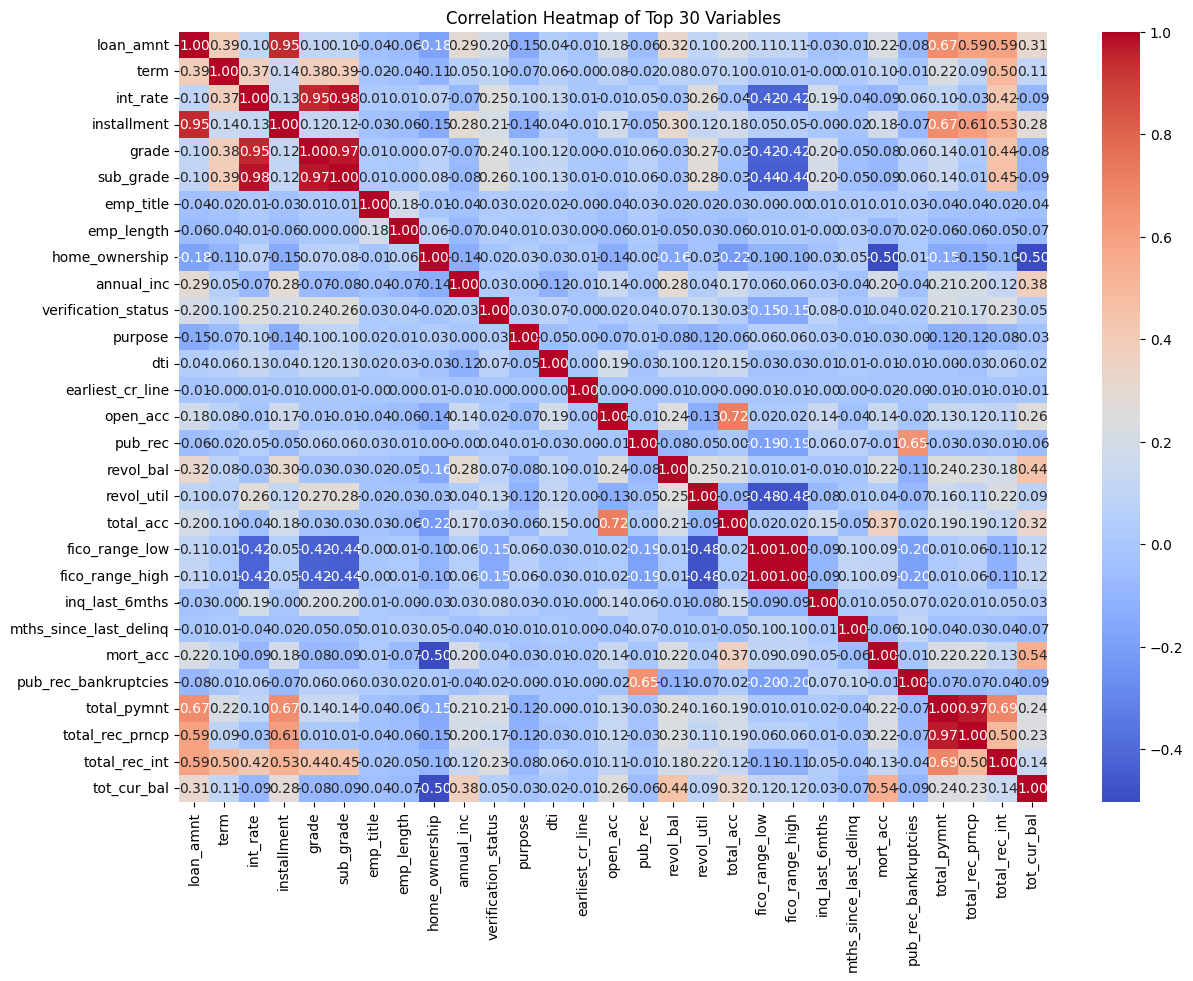

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype(str)
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Select top 30 socioeconomic and loan variables
columns = [
    "loan_amnt", "term", "int_rate", "installment", "grade", "sub_grade",
    "emp_title", "emp_length", "home_ownership", "annual_inc",
    "verification_status", "purpose", "dti",
    "earliest_cr_line", "open_acc", "pub_rec", "revol_bal", "revol_util",
    "total_acc", "fico_range_low", "fico_range_high", "inq_last_6mths",
    "mths_since_last_delinq", "mort_acc", "pub_rec_bankruptcies",
    "total_pymnt", "total_rec_prncp", "total_rec_int", "tot_cur_bal"
]

# Compute the correlation matrix
corr_matrix = data[columns].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Top 30 Variables")
plt.show()


Feature Importance

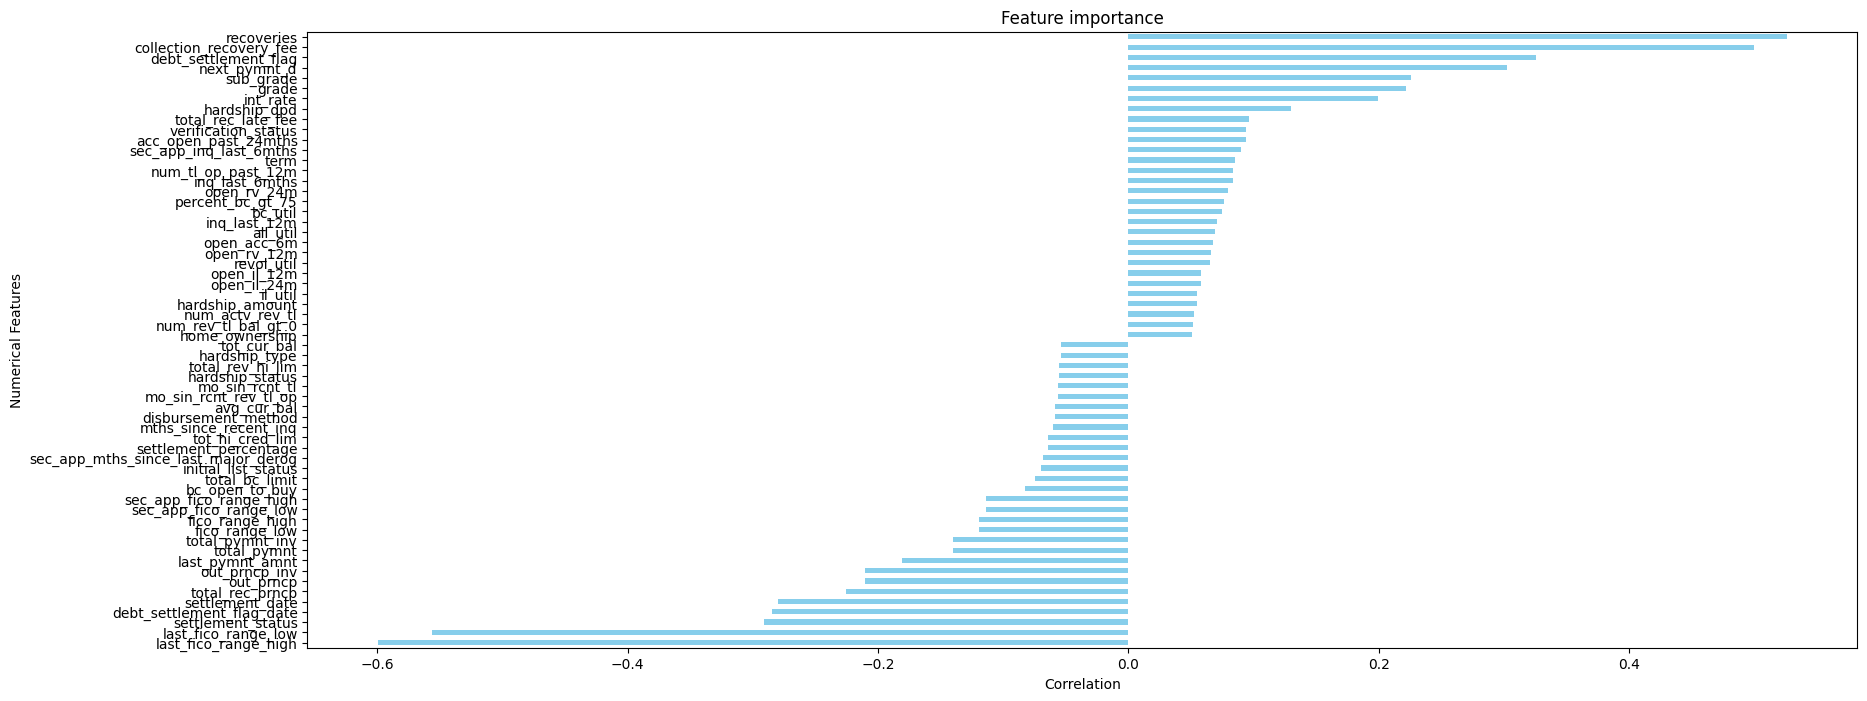

In [7]:

# Calculate correlation with 'loan_status'
correlation = data.corr()['default'].drop('default').sort_values()

# Filter correlations to only include those with an absolute value greater than 0.05
filtered_correlation = correlation[correlation.abs() > 0.05].sort_values()

# Plot the correlation as a horizontal bar chart
plt.figure(figsize=(20, 8))
filtered_correlation.plot(kind='barh', color='skyblue')
plt.title("Feature importance")
plt.xlabel("Correlation")
plt.ylabel("Numerical Features")
plt.show()

**Summary of EDA**


**Heatmap:** Key observations:
- Strong positive correlations between `loan_amnt`, `installment`, and `total_pymnt`, indicating higher loan amounts lead to higher monthly installments and total payments.
- Significant correlations between FICO scores (`fico_range_low`, `fico_range_high`) and loan performance, highlighting the importance of credit scores in predicting defaults.

**Bar Chart:** Highlights:
- Negative correlations with `recoveries`, `collection_recovery_fee`, and `debt_settlement_flag`, suggesting defaulted loans have higher associated fees.

**Conclusions of EDA**

The EDA reveals critical factors influencing loan default, such as credit scores, loan amounts, and recovery-related fees. These findings suggest lenders should focus on these variables to reduce default risk.

The imbalance in loan status distribution poses a challenge for training accurate models.

# Models

**Feature Engineering**

To handle missing values, let's fill numerical columns with the median and categorical columns with the mode. This approach ensures that we do not introduce bias from missing data.

In [8]:
# Handle missing values
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill missing values with the median for numerical features and the mode for categorical features
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values with the mode for categorical features
for col in categorical_cols:
    if not data[col].mode().empty:
        mode_value = data[col].mode().iloc[0]
        data[col] = data[col].fillna(mode_value)
    else:
        data[col] = data[col].fillna('Unknown')  # or any other default value



# Verify there are no missing values left
print(data.isnull().sum().max())

# Verify the changes
#print(data.head())

0


**Multicollinearity**

Let's examine the feature pairs for collinearity. Some features, such as grade and interest rate, are highly correlated, which is expected. However, the data should ideally show more variation.

This project will use XGBoost and Logistic Regression as models. XGBoost should handle multicollinearity well, but Logistic Regression might face issues. If we encounter problems during model training, we can consider dropping some of these highly correlated columns.

In [10]:
# Identify highly correlated pairs
threshold = 0.8
high_corr_pairs = [(feature1, feature2) for feature1 in corr_matrix.columns for feature2 in corr_matrix.columns if feature1 != feature2 and abs(corr_matrix.loc[feature1, feature2]) > threshold]

print("Highly correlated pairs (threshold > 0.8):")
print(high_corr_pairs)

Highly correlated pairs (threshold > 0.8):
[('loan_amnt', 'installment'), ('int_rate', 'grade'), ('int_rate', 'sub_grade'), ('installment', 'loan_amnt'), ('grade', 'int_rate'), ('grade', 'sub_grade'), ('sub_grade', 'int_rate'), ('sub_grade', 'grade'), ('fico_range_low', 'fico_range_high'), ('fico_range_high', 'fico_range_low'), ('total_pymnt', 'total_rec_prncp'), ('total_rec_prncp', 'total_pymnt')]


**Model selection**

This project will implement:
*   Logistic Regression for its interpretability and efficiency, making it a reliable baseline for binary classification.
*   XGBoost, with its powerful handling of complex data and imbalances, which can lead to high predictive accuracy.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype(str)
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into training and test sets
X = data.drop(columns=['default'])
y = data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=200), #Using 200 itereations as hyperparam to execute faster
    'XGBoost': xgb.XGBClassifier(scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1], use_label_encoder=False, eval_metric='logloss')
}


# Results and Analysis

For evaluation metrics it is a good approach to use False Positive Rate (FPR) and True Negative Rate (TNR or Specificity). These metrics are more intuitive for understanding the rates of giving loans to people who won't pay it back and rejecting people who would.

False Positive Rate (FPR): The proportion of actual negatives (people who wouldn't default) that were incorrectly classified as positives (default).

True Negative Rate (TNR) or Specificity: The proportion of actual negatives (people who wouldn't default) that were correctly identified.

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Evaluation Metrics:
False Positive Rate (FPR): 0.000376
True Negative Rate (TNR): 0.999624


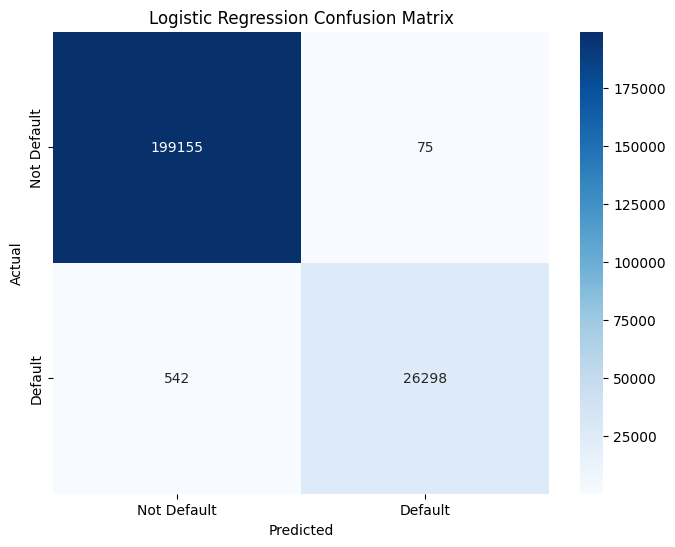

Training XGBoost...

XGBoost Evaluation Metrics:
False Positive Rate (FPR): 0.000015
True Negative Rate (TNR): 0.999985


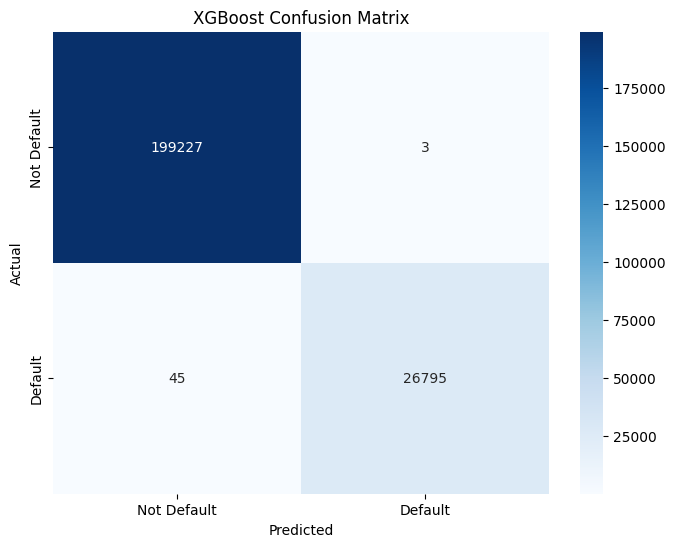

In [13]:
#training will take 2 minutes

# Train and evaluate each model
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    #print(cm)
    #print(cm.ravel())

    # Extract true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = cm.ravel()

    # Calculate FPR and TNR
    fpr = fp / (fp + tn)
    tnr = tn / (tn + fp)

    print(f"\n{name} Evaluation Metrics:")
    print(f"False Positive Rate (FPR): {fpr:.6f}")
    print(f"True Negative Rate (TNR): {tnr:.6f}")

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**Results and Analysis**

Summary:

XGBoost outperformed Logistic Regression, particularly in terms of False Positive Rate (FPR) and True Negative Rate (TNR), as shown in the confusion matrix. This was anticipated given XGBoost's robustness. Specifically, the algorithm achieved an impressive FPR of 0.000015 and a TNR of 0.999985, indicating it is highly effective at distinguishing between classes, making its implementation a promising option.

Given these high metrics, it's essential to verify the dataset's integrity and consider whether features related to collections are revealing the loan's default status. For future improvements, removing such features could enable the algorithm to better predict which lenders are likely to default before issuing the loan, enhancing its practical application.

# Discussion and Conclusion

**Takeaways:**

Predicting loan defaults can significantly reduce lender risk. Key factors influencing loan repayment prediction include collection data, credit scores, socioeconomic variables, interest rates, and grading.

**Challenges:**

Data Anonymization: Anonymized data can reduce the model's precision, as some critical information may be obscured.

Imbalanced Dataset: The imbalance between defaulted and non-defaulted loans necessitates careful handling of class weights to ensure the model performs well across all classes.

**Future Improvements:**

Feature Refinement: Removing collection data in future models could help ensure that the predictions are based on pre-loan issuance factors, making the model more useful for lenders in assessing potential borrowers.

Enhanced Data Handling: Addressing data imbalances through more robust techniques.